In [1]:
## Title: Bike Details Dataset


# EDA - 1

# Title: Bike Details Dataset bold text

In [2]:
# =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
# selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
# year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
# seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
# owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
# km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
# ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('BIKE DETAILS.csv')

In [18]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [19]:
# 1 ) What is the range of selling prices in the dataset

In [20]:
# Ans
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = (min_price, max_price)

print(f"The range of selling prices is: {price_range}")

The range of selling prices is: (5000, 760000)


In [21]:
#(2) What is the median selling price for bikes in the dataset

In [22]:

median_price = df['selling_price'].median()

print(f"The median selling price for bikes is: {median_price}")

The median selling price for bikes is: 45000.0


In [23]:
#(3) What is the most common seller type


In [27]:
most_seller = df['seller_type'].value_counts().idxmax()
print(most_seller)

Individual


In [30]:
#(4) How many bikes have driven more than 50,000 kilometers

In [32]:
bikes_above_50k_km = df[df['km_driven'] > 50000]

num_bikes_above_50k_km = bikes_above_50k_km.shape[0]

print(f"Number of bikes driven more than 50,000 kilometers: {num_bikes_above_50k_km}")

Number of bikes driven more than 50,000 kilometers: 170


In [33]:
#(5)What is the average km_driven value for each ownership type

In [35]:
km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print(km_driven_by_ownership)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [36]:
#(6)What proportion of bikes are from the year 2015 or older

In [38]:
df['year']= pd.to_datetime(df['year'].astype(str), format="%Y")

In [39]:
df['year']

,year
0,2019-01-01
1,2017-01-01
2,2018-01-01
3,2015-01-01
4,2011-01-01
...,...
1056,2010-01-01
1057,2012-01-01
1058,2013-01-01
1059,2009-01-01


In [40]:
#(7)What is the trend of missing values across the dataset


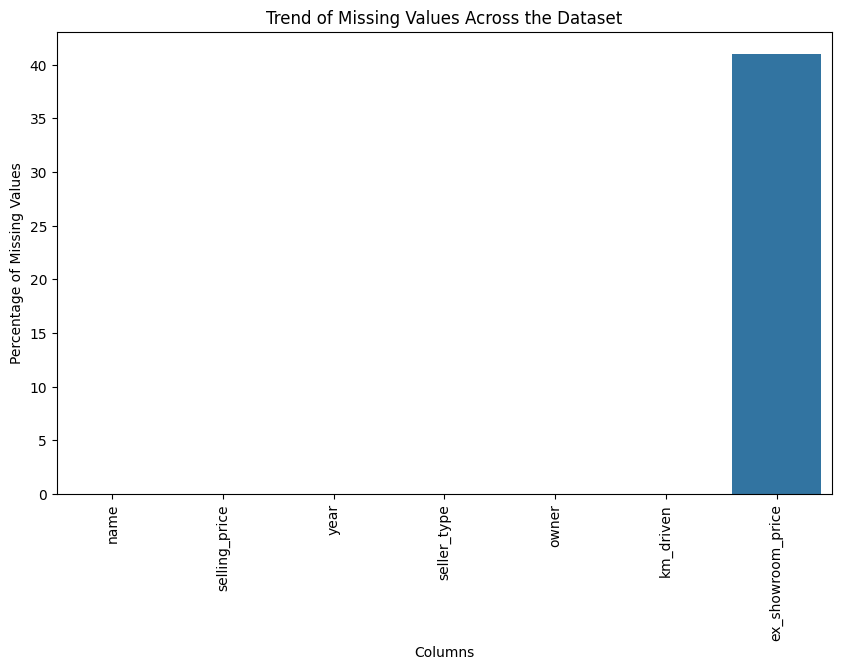

In [41]:

missing_percentage = df.isnull().sum() * 100 / len(df)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.title('Trend of Missing Values Across the Dataset')
plt.show()

In [42]:
#(8)What is the highest ex_showroom_price recorded, and for which bike

In [43]:

highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name'].iloc[0]

print(f"The highest ex_showroom_price is: {highest_ex_showroom_price}")
print(f"The bike with the highest ex_showroom_price is: {bike_with_highest_price}")

The highest ex_showroom_price is: 1278000.0
The bike with the highest ex_showroom_price is: Harley-Davidson Street Bob


In [44]:
#(9)What is the total number of bikes listed by each seller typeD

In [45]:

bike_counts_by_seller = df.groupby('seller_type')['name'].count()
bike_counts_by_seller

,name
seller_type,
Dealer,6
Individual,1055


In [46]:
#(10)What is the relationship between selling_price and km_driven for first-owner bikes

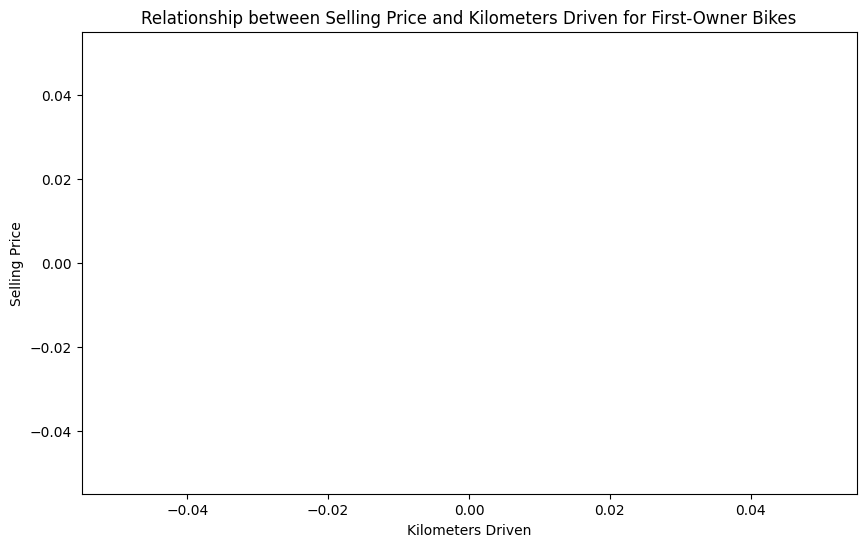

The correlation coefficient between selling price and km_driven for first-owner bikes is: nan


In [47]:

first_owner_bikes = df[df['owner'] == '1st Owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Relationship between Selling Price and Kilometers Driven for First-Owner Bikes')
plt.show()

correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"The correlation coeffici#ent between selling price and km_driven for first-owner bikes is: {correlation}")

In [48]:
#(11)B Identify and remove outliers in the km_driven column using the IQR method

In [4]:

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

num_outliers_removed = len(df) - len(df_no_outliers)
print(f"Number of outliers removed: {num_outliers_removed}")

Number of outliers removed: 39


In [5]:
#(12) Perform a bivariate analysis to visualize the relationship between year and selling_price

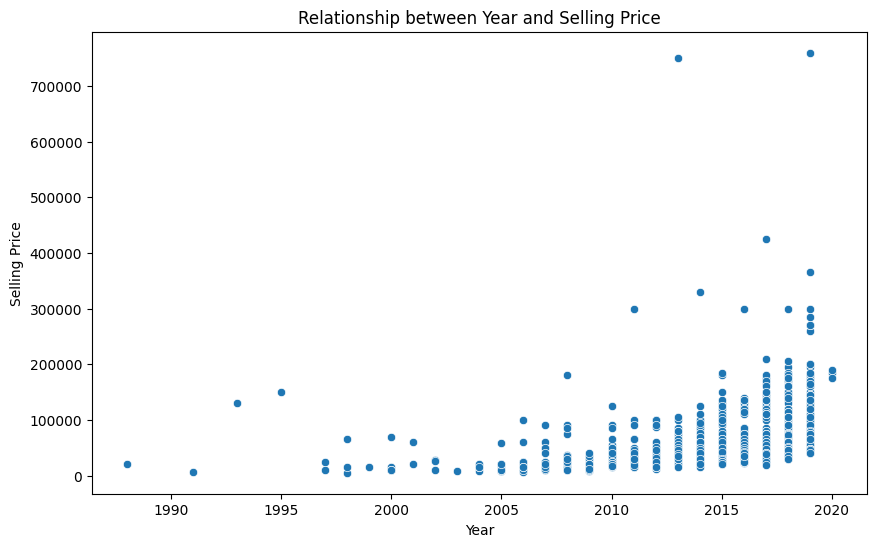

The correlation coefficient between year and selling price is: 0.40218840061474403


In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()

correlation = df['year'].corr(df['selling_price'])
print(f"The correlation coefficient between year and selling price is: {correlation}")

In [7]:
# (13)What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [12]:


current_year = pd.to_datetime('today').year
df['bike_age'] = current_year - df['year'].dt.year


df['depreciation'] = df['ex_showroom_price'] - df['selling_price']


average_depreciation_by_age = df.groupby('bike_age')['depreciation'].mean()

average_depreciation_by_age

,depreciation
bike_age,
4,-34260.000000
5,2954.562500
6,13023.194805
7,22306.082353
8,28328.190476
9,28013.275000
10,34505.606061
11,43086.886792
12,37317.648649


In [13]:
#(14)Which bike names are priced significantly above the average price for their manufacturing year


In [14]:
average_price_by_year = df.groupby('year')['selling_price'].mean()

df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))

df['price_diff'] = df['selling_price'] - df['selling_price_avg']

threshold = 2 * df['price_diff'].std()

# Identify bikes with prices significantly above average
significantly_above_average = df[df['price_diff'] > threshold]

# Print the names of these bikes
print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
146                              KTM RC 390
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
449           Royal Enfield Classic Signals
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


In [15]:
#(15)Develop a correlation matrix for numeric columns and visualize it using a heatmap.

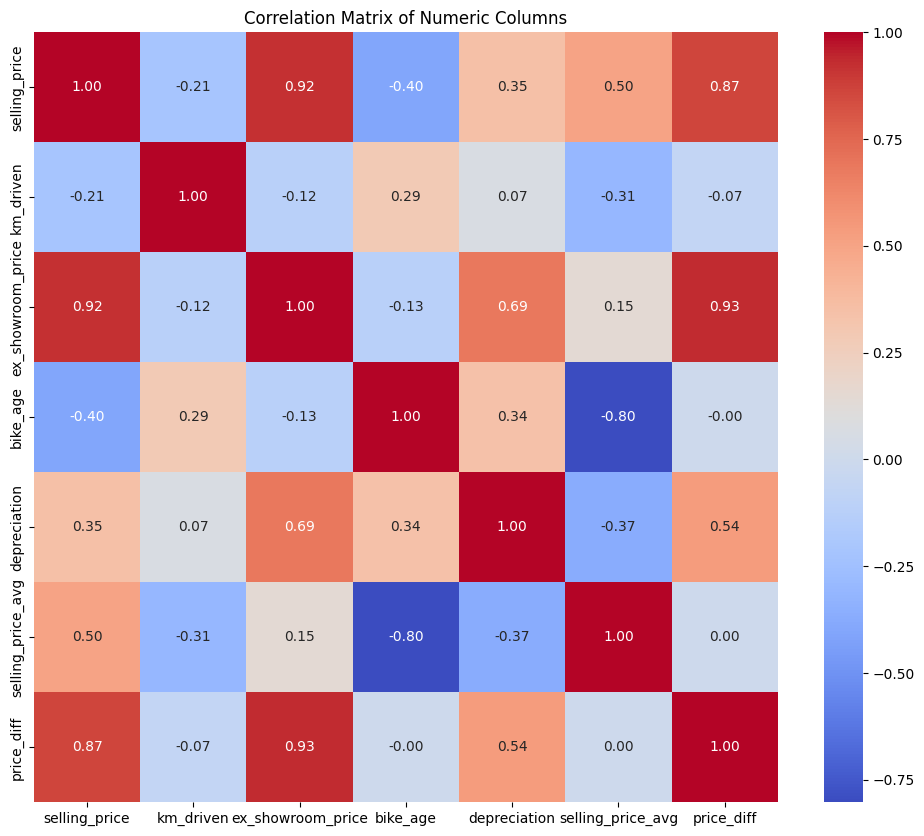

In [16]:

numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

## EDA - 2

## About - Dataset:


# Title: Car Sale Dataset
# Features:


 Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 Customer Name: The name of the customer who purchased the car, represented as a string
 Gender: The gender of the customer, categorized as "Male" or "Female.
 Annual Income: The customer's annual income in US dollars, represented as a numeric value
 Dealer_Name: The name of the dealership selling the car, represented as a string
 Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 Model: The specific model name of the car, such as "Corolla," "Civic," etc
 Engine: The engine type of the car, such as "V6," "I4," etc
 Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 Price ($): The selling price of the car in US dollars
 Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
 Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.
_ What is the average selling price of cars for each dealer, and how does it compare across different dealersE
G Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trendsE
> What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compareE
= What is the distribution of car prices across different regionsE
^ What is the distribution of cars based on body stylesE
; How does the average selling price of cars vary by customer gender and annual incomeE
9 What is the distribution of car prices by region, and how does the number of cars sold vary by regionE
I How does the average car price differ between cars with different engine sizesE
[ How do car prices vary based on the customer’s annual income bracketE
_V What are the top 5 car models with the highest number of sales, and how does their price distribution lookE
__ How does car price vary with engine size across different car colors, and which colors have the highest price
variationE
_G Is there any seasonal trend in car sales based on the date of saleE
_> How does the car price distribution change when considering different combinations of body style and
transmission typeE
_= What is the correlation between car price, engine size, and annual income of customers, and how do these
features interactE
_^ How does the average car price vary across different car models and engine types?
F

In [18]:
df2 = pd.read_csv('Car Sale.csv')

In [ ]:
#(1)What is the average selling price of cars for each dealer, and how does it compare across different dealers

Dealer_Name
Buddy Storbeck's Diesel Service Inc                28998.445055
C & M Motors Inc                                   28037.873494
Capitol KIA                                        27588.421053
Chrysler Plymouth                                  28812.215909
Chrysler of Tri-Cities                             28098.017964
Classic Chevy                                      27472.289773
Clay Johnson Auto Sales                            28840.613636
Diehl Motor CO Inc                                 28250.710983
Enterprise Rent A Car                              27845.605882
Gartner Buick Hyundai Saab                         28173.928571
Hatfield Volkswagen                                27648.610778
Iceberg Rentals                                    28650.652941
McKinney Dodge Chrysler Jeep                       27333.027933
Motor Vehicle Branch Office                        28694.412429
Nebo Chevrolet                                     28353.247126
New Castle Ford Lincoln Merc

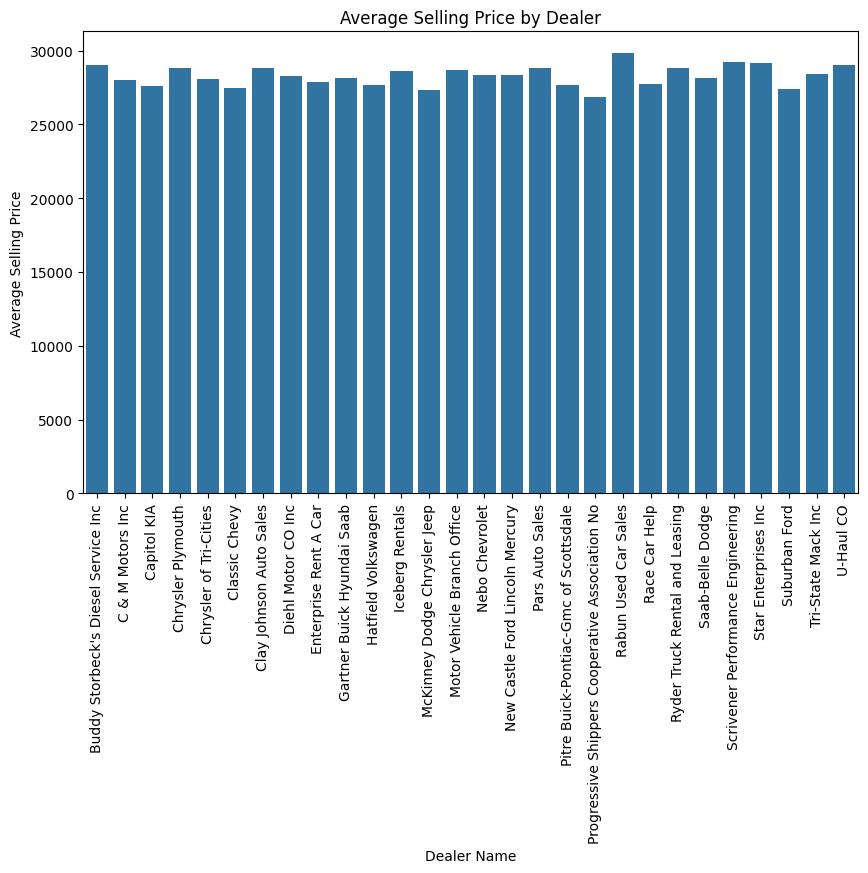

In [19]:

average_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean()
print(average_price_by_dealer)

print("\nComparison of average selling prices across dealers:")
print(average_price_by_dealer.describe())

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_dealer.index, y=average_price_by_dealer.values)
plt.xticks(rotation=90)
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Dealer")
plt.show()

In [20]:
#(2)Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [21]:
price_variation_by_brand = df2.groupby('Company')['Price ($)'].std()


brand_with_highest_variation = price_variation_by_brand.idxmax()
highest_variation = price_variation_by_brand.max()

print(f"The car brand with the highest price variation is {brand_with_highest_variation} with a standard deviation of {highest_variation}.")


print("\nAnalysis of Pricing Trends:")
if highest_variation > 0:  # Check if there's any variation to avoid division by zero errors
    print(f"A high standard deviation in prices for {brand_with_highest_variation} suggests a wide range of models or configurations available, leading to significant price differences.")
    print("This could be due to factors like engine size, features, trim levels, or model year.")
else:
    print(f"There is no price variation for {brand_with_highest_variation}.")

The car brand with the highest price variation is Saab with a standard deviation of 21440.45985989478.

Analysis of Pricing Trends:
A high standard deviation in prices for Saab suggests a wide range of models or configurations available, leading to significant price differences.
This could be due to factors like engine size, features, trim levels, or model year.


In [22]:
#(3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

               count          mean           std      min      25%      50%  \
Transmission                                                                  
Auto          3471.0  28543.788534  13842.971137   9000.0  19000.0  24500.0   
Manual        3077.0  28115.680208  15919.618637  10000.0  17000.0  22100.0   

                  75%      max  
Transmission                    
Auto          36000.0  75600.0  
Manual        34000.0  85600.0  

Interquartile Ranges (IQR):
Transmission
Auto      17000.0
Manual    17000.0
dtype: float64


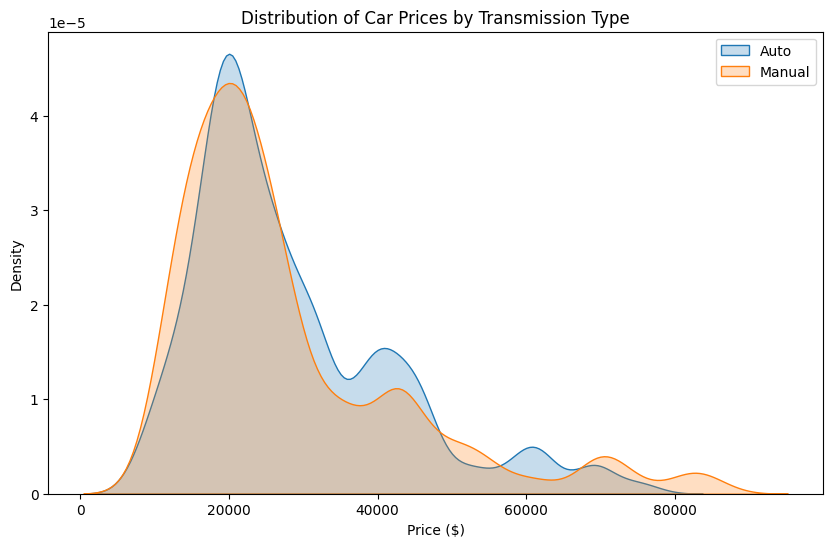


Analysis:
The plots and IQR values show how the price distributions differ between transmission types.
A larger IQR suggests greater price variability within that transmission type.


In [23]:

transmission_groups = df2.groupby('Transmission')['Price ($)']

price_stats = transmission_groups.describe()

iqr_values = price_stats['75%'] - price_stats['25%']

print(price_stats)
print("\nInterquartile Ranges (IQR):")
print(iqr_values)

plt.figure(figsize=(10, 6))
for transmission, group_data in transmission_groups:
    sns.kdeplot(group_data, label=transmission, fill=True)
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.title("Distribution of Car Prices by Transmission Type")
plt.legend()
plt.show()

print("\nAnalysis:")
print("The plots and IQR values show how the price distributions differ between transmission types.")
print("A larger IQR suggests greater price variability within that transmission type.")

In [24]:
#(4)What is the distribution of car prices across different regions

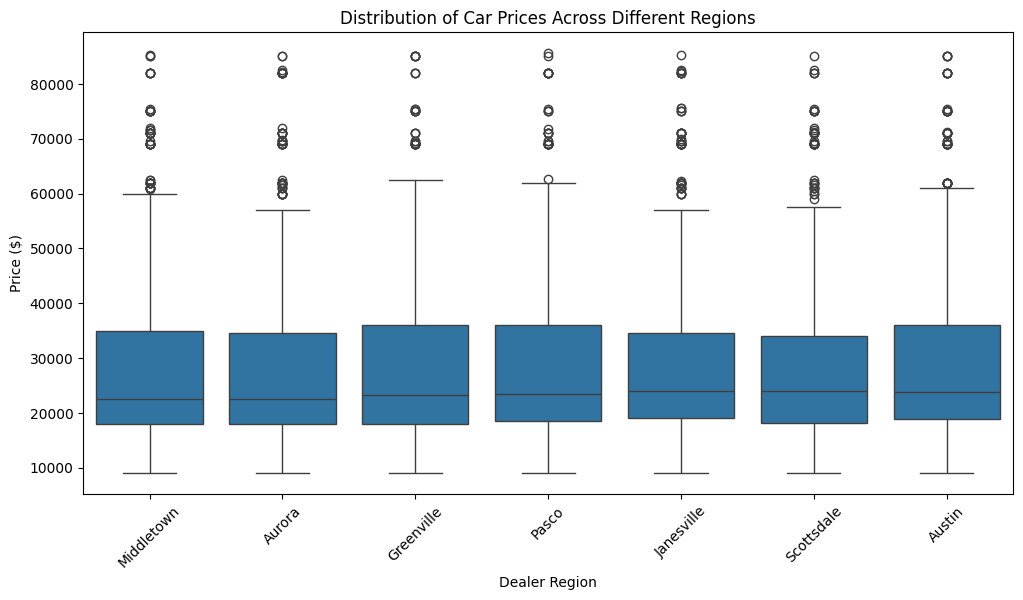

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,840.0,28239.501190,15057.739342,9000.0,18000.0,22500.5,34625.25,85000.0
Austin,1137.0,28398.290237,14839.626139,9000.0,18800.0,23801.0,36000.00,85000.0
Greenville,848.0,28517.461085,15078.998204,9000.0,18000.0,23300.0,36000.00,85001.0
Janesville,1060.0,28197.446226,14295.532540,9000.0,19000.0,24000.0,34500.00,85301.0
Middletown,862.0,28380.314385,15463.661512,9000.0,18000.0,22500.0,35000.00,85250.0
Pasco,845.0,28497.461538,15123.234876,9000.0,18500.0,23500.0,36000.00,85600.0
Scottsdale,956.0,28202.003138,14340.241747,9000.0,18195.0,24000.0,34000.00,85000.0


In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# Calculate and print descriptive statistics for price in each region
price_by_region = df2.groupby('Dealer_Region')['Price ($)'].describe()
price_by_region

In [26]:
#(5)What is the distribution of cars based on body styles

Body Style
Hatchback    1910
SUV          1710
Sedan        1269
Passenger    1058
Hardtop       601
Name: count, dtype: int64


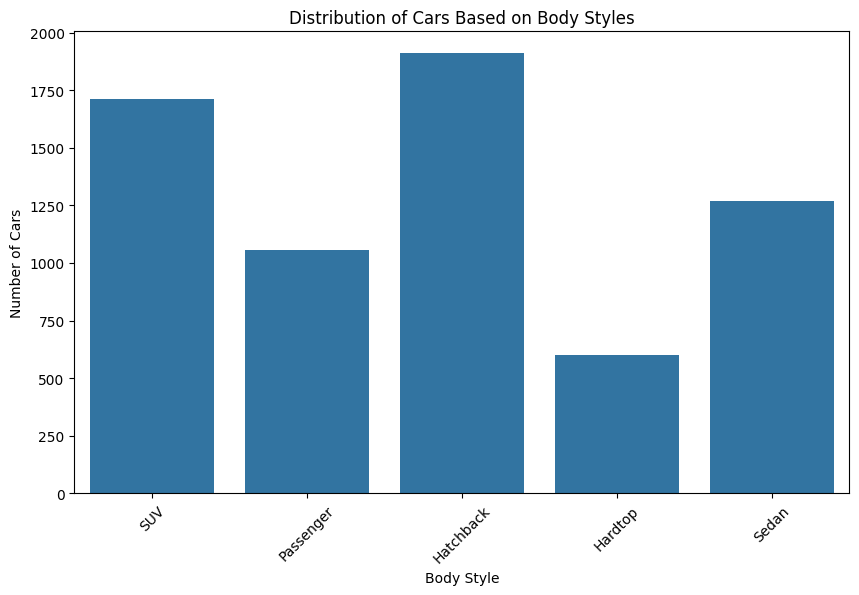

In [27]:

body_style_counts = df2['Body Style'].value_counts()
print(body_style_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df2)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [28]:
#(6)How does the average selling price of cars vary by customer gender and annual income

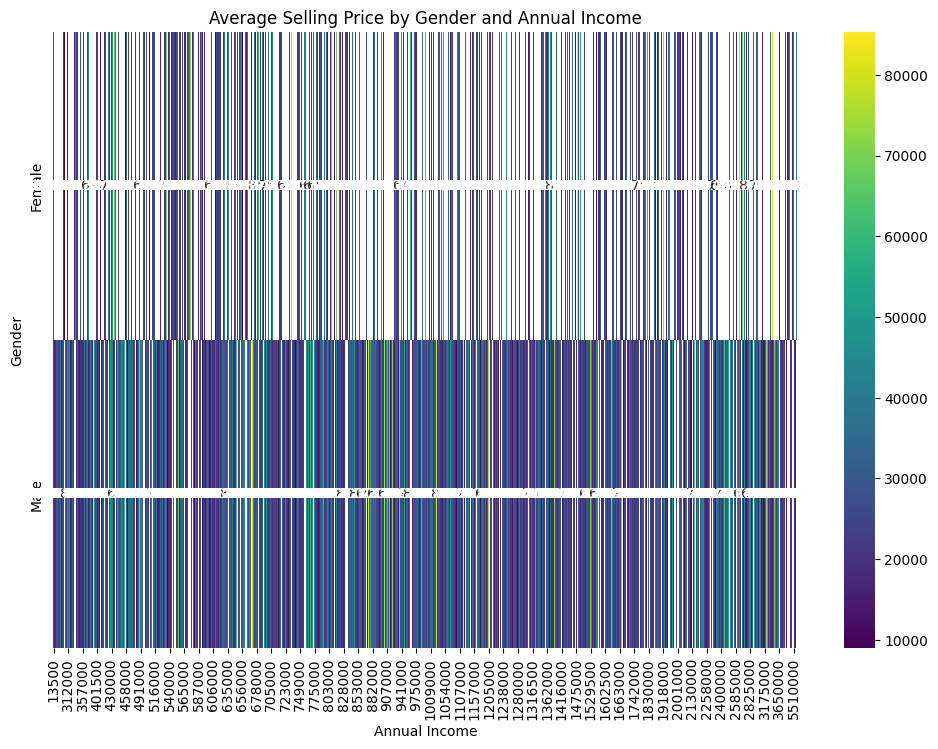

In [29]:

average_price_by_gender_income = df2.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(average_price_by_gender_income, annot=True, fmt=".2f", cmap="viridis")
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Gender')
plt.show()

In [30]:
#(7)What is the distribution of car prices by region, and how does the number of cars sold vary by region

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora          840.0  28239.501190  15057.739342  9000.0  18000.0  22500.5   
Austin         1137.0  28398.290237  14839.626139  9000.0  18800.0  23801.0   
Greenville      848.0  28517.461085  15078.998204  9000.0  18000.0  23300.0   
Janesville     1060.0  28197.446226  14295.532540  9000.0  19000.0  24000.0   
Middletown      862.0  28380.314385  15463.661512  9000.0  18000.0  22500.0   
Pasco           845.0  28497.461538  15123.234876  9000.0  18500.0  23500.0   
Scottsdale      956.0  28202.003138  14340.241747  9000.0  18195.0  24000.0   

                    75%      max  
Dealer_Region                     
Aurora         34625.25  85000.0  
Austin         36000.00  85000.0  
Greenville     36000.00  85001.0  
Janesville     34500.00  85301.0  
Middletown     35000.00  85250.0  
Pasco          36000.00  85600.0  
Scottsda

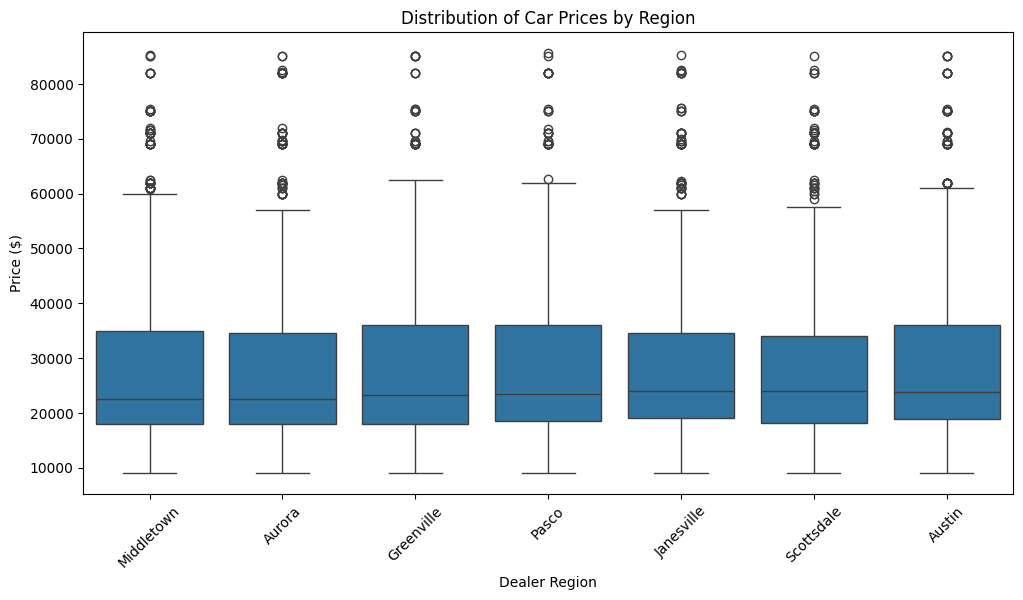


Number of Cars Sold by Region:
 Dealer_Region
Austin        1137
Janesville    1060
Scottsdale     956
Middletown     862
Greenville     848
Pasco          845
Aurora         840
Name: count, dtype: int64


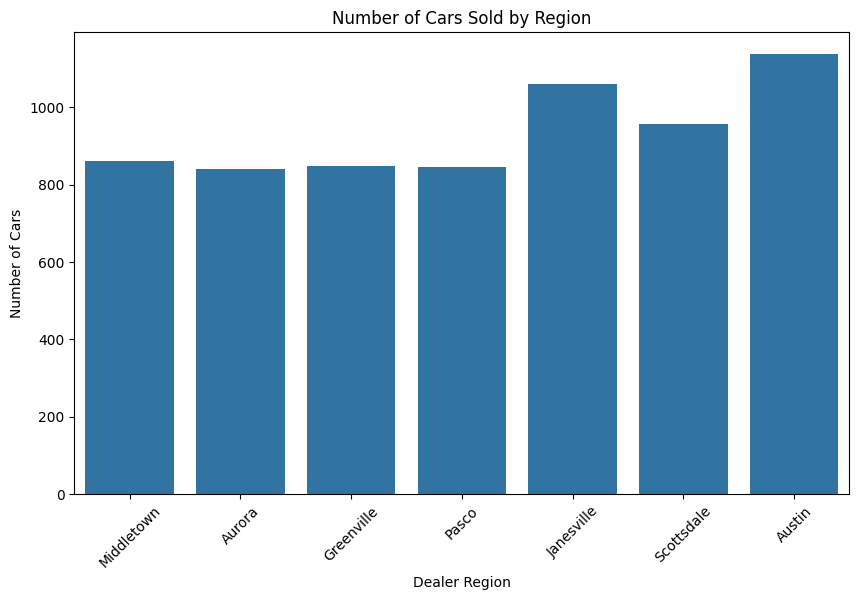

In [31]:
price_distribution_by_region = df2.groupby('Dealer_Region')['Price ($)'].describe()
print(price_distribution_by_region)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Calculate the number of cars sold in each region
cars_sold_by_region = df2['Dealer_Region'].value_counts()
print("\nNumber of Cars Sold by Region:\n", cars_sold_by_region)

# Visualize the number of cars sold
plt.figure(figsize=(10, 6))
sns.countplot(x='Dealer_Region', data=df2)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [33]:
#(8)How does the average car price differ between cars with different engine sizes

Engine
DoubleÂ Overhead Camshaft    28543.788534
Overhead Camshaft            28115.680208
Name: Price ($), dtype: float64


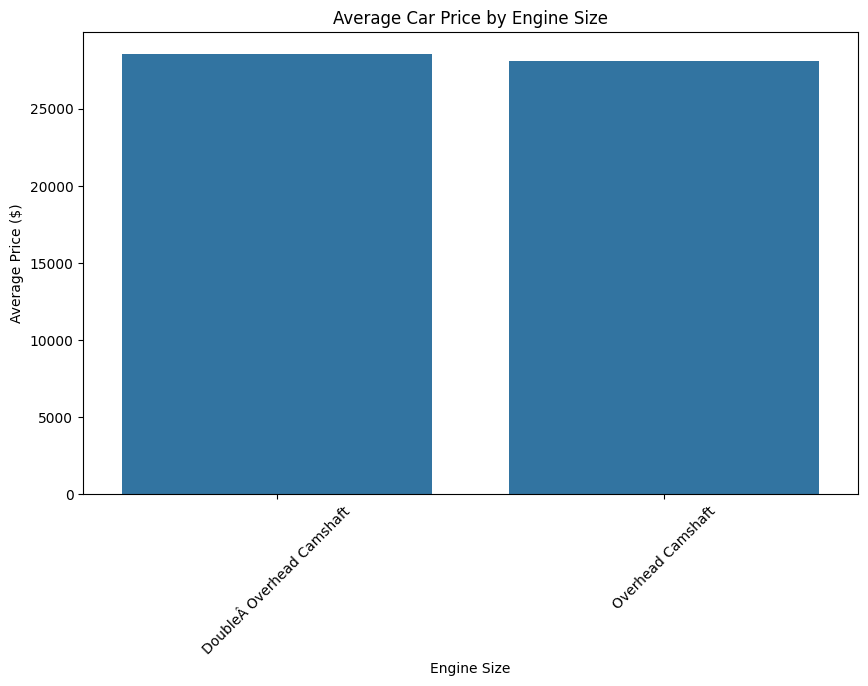

In [34]:
average_price_by_engine = df2.groupby('Engine')['Price ($)'].mean()

print(average_price_by_engine)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_engine.index, y=average_price_by_engine.values)
plt.xlabel("Engine Size")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Engine Size")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [35]:
#(9)How do car prices vary based on the customer’s annual income bracket

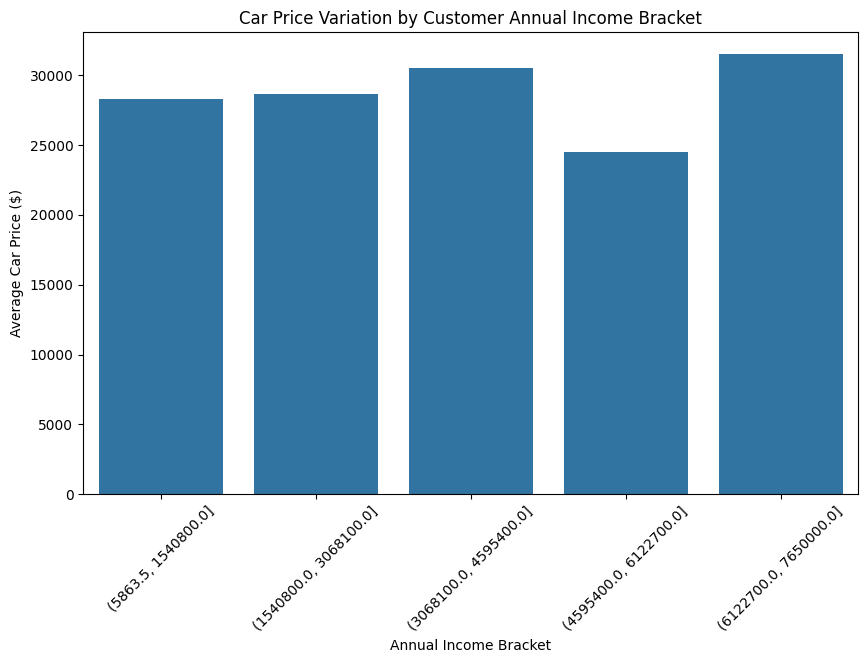

,Price ($)
Annual Income,
"(5863.5, 1540800.0]",28271.375823
"(1540800.0, 3068100.0]",28671.807646
"(3068100.0, 4595400.0]",30545.717949
"(4595400.0, 6122700.0]",24517.928571
"(6122700.0, 7650000.0]",31500.000000


In [36]:
income_brackets = pd.cut(df2['Annual Income'], bins=5)  # Define 5 income brackets
average_price_by_income = df2.groupby(income_brackets)['Price ($)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_income.index, y=average_price_by_income.values)
plt.xlabel("Annual Income Bracket")
plt.ylabel("Average Car Price ($)")
plt.title("Car Price Variation by Customer Annual Income Bracket")
plt.xticks(rotation=45)
plt.show()

# Print the average car price for each income bracket
average_price_by_income

In [37]:
#(10)What are the top 5 car models with the highest number of sales, and how does their price distribution look

Model
Prizm         115
Diamante      114
RL            114
Passat        111
Silhouette    110
Name: count, dtype: int64


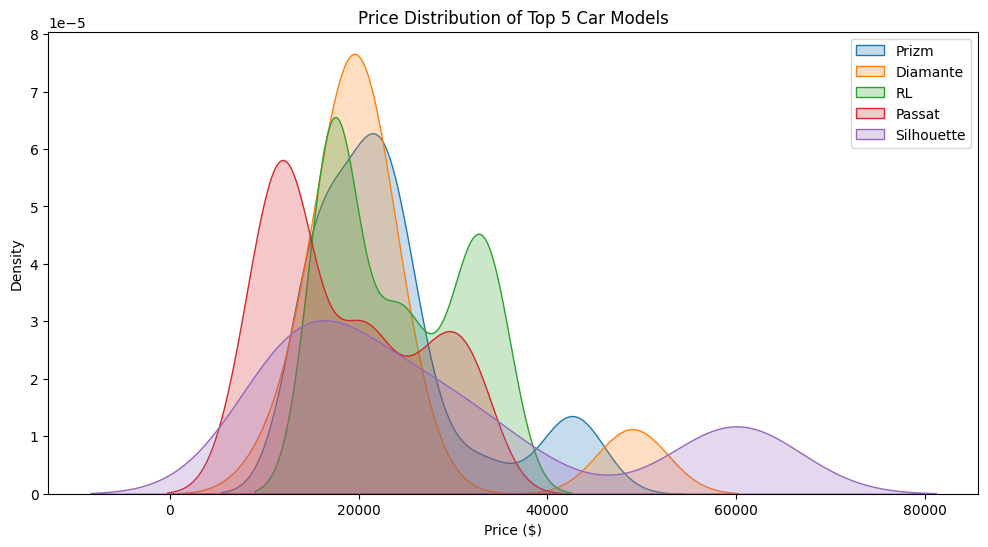

In [38]:
top_5_models = df2['Model'].value_counts().head(5)
print(top_5_models)

plt.figure(figsize=(12, 6))
for model in top_5_models.index:
    sns.kdeplot(df2[df2['Model'] == model]['Price ($)'], label=model, fill=True)
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.title("Price Distribution of Top 5 Car Models")
plt.legend()
plt.show()

In [39]:
#(11)How does car price vary with engine size across different car colors, and which colors have the highest price variationE

The color with the highest price variation is: Pale White


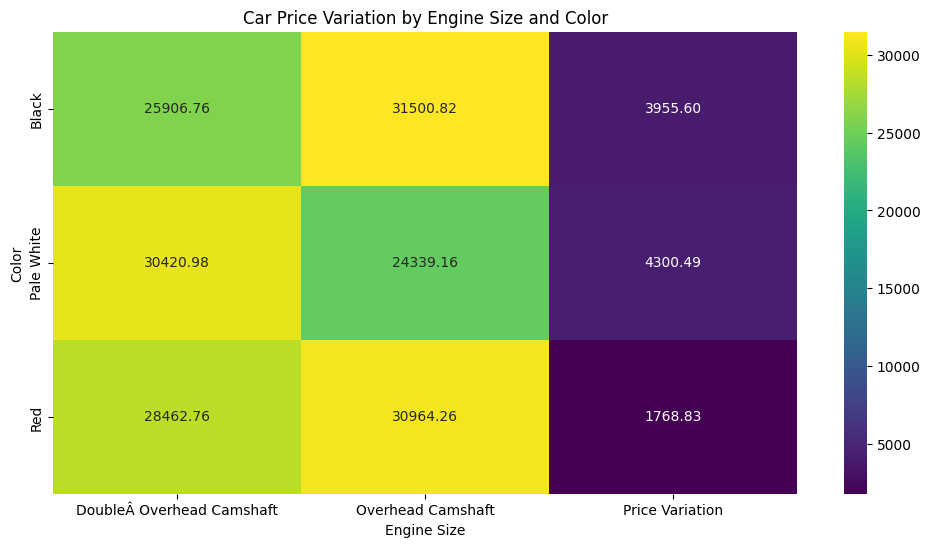

In [40]:

price_variation = df2.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()

price_variation['Price Variation'] = price_variation.std(axis=1)

color_highest_variation = price_variation['Price Variation'].idxmax()
print(f"The color with the highest price variation is: {color_highest_variation}")


# Visualization (optional)
plt.figure(figsize=(12, 6))
sns.heatmap(price_variation, annot=True, cmap="viridis", fmt=".2f")
plt.title('Car Price Variation by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Color')
plt.show()

In [41]:
#(12) Is there any seasonal trend in car sales based on the date of sale

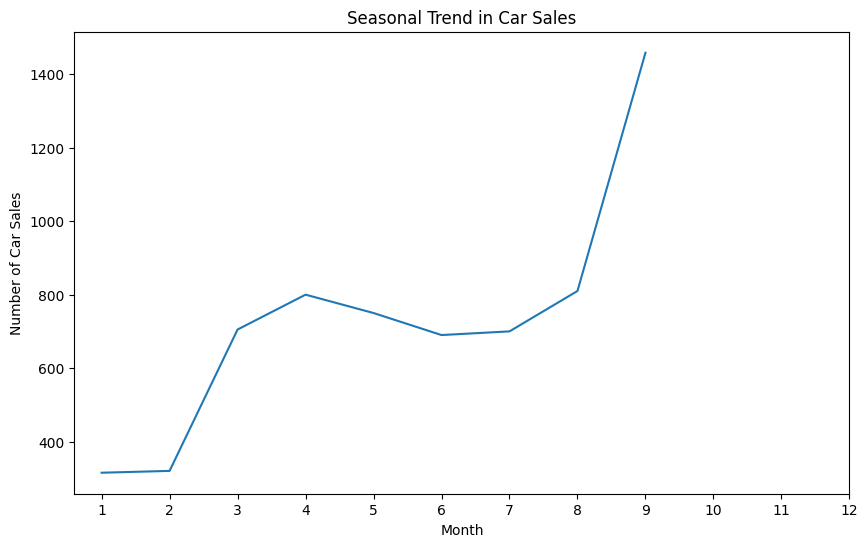

In [42]:
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Month'] = df2['Date'].dt.month


monthly_sales = df2.groupby('Month')['Car_id'].count()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Number of Car Sales")
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.show()

In [43]:
#(13)How does the car price distribution change when considering different combinations of body style and
#transmission type

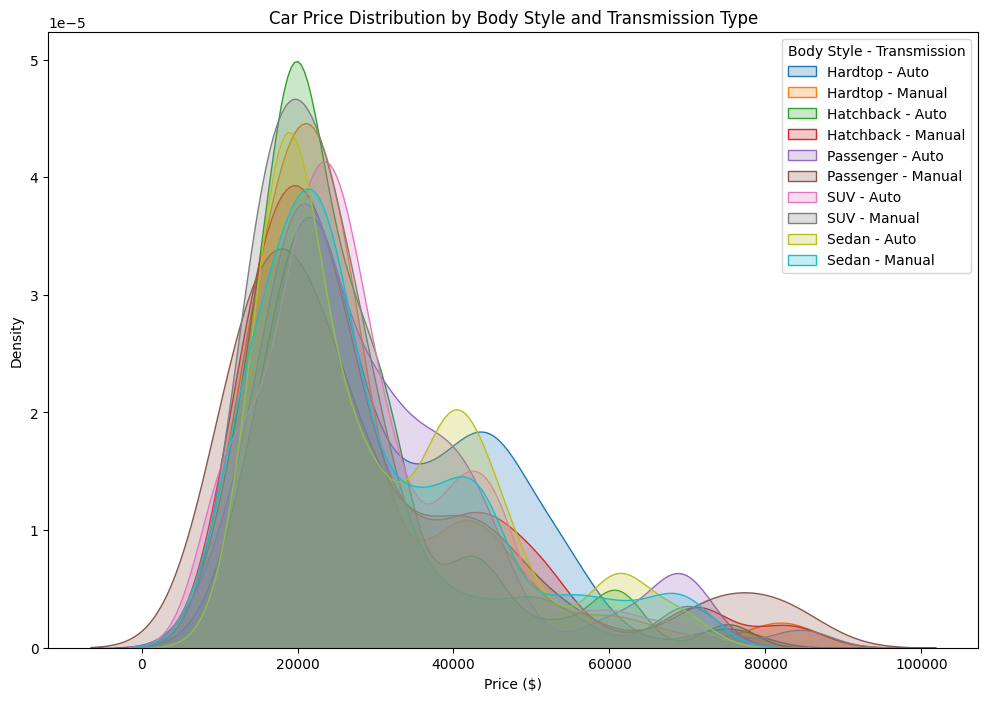

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto           276.0  31313.018116  13751.751937  12000.0  21000.0   
           Manual         325.0  27474.120000  14709.461316  11000.0  18000.0   
Hatchback  Auto          1035.0  26295.451208  13123.393271   9000.0  18000.0   
           Manual         875.0  28932.105143  16184.257645  11000.0  17001.0   
Passenger  Auto           568.0  29790.366197  14658.117405   9000.0  19000.0   
           Manual         490.0  29506.918367  19043.989014  10000.0  16175.0   
SUV        Auto           845.0  28007.153846  13189.168486   9000.0  19000.0   
           Manual         865.0  26179.235838  14595.122518  10000.0  17000.0   
Sedan      Auto           747.0  30294.955823  14435.572457  12000.0  19000.0   
           Manual         522.0  29049.498084  14777.603598  11000.0  19250.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  42001.0  75001.0  
           Manual        22800.0  29000.0  82300.0  
Hatchback  Auto          22000.0  31000.0  75600.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.5  38000.0  69800.0  
           Manual        22000.0  39126.0  85301.0  
SUV        Auto          25001.0  33500.0  75501.0  
           Manual        22000.0  29000.0  85250.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        24700.0  36000.0  69500.0

In [44]:
grouped_data = df2.groupby(['Body Style', 'Transmission'])['Price ($)']

price_stats = grouped_data.describe()

# Plotting
plt.figure(figsize=(12, 8))
for (body_style, transmission), group_data in grouped_data:
    sns.kdeplot(group_data, label=f"{body_style} - {transmission}", fill=True)
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.legend(title="Body Style - Transmission")
plt.show()

# Display descriptive statistics
price_stats

In [45]:
#(14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

               Price ($)  Annual Income
Price ($)       1.000000       0.015462
Annual Income   0.015462       1.000000


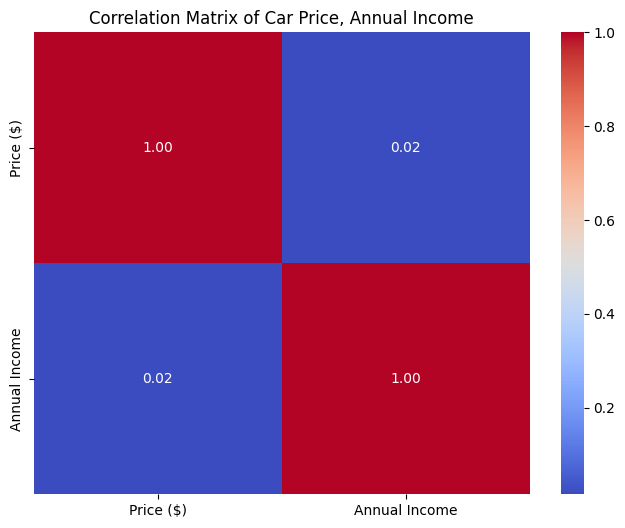

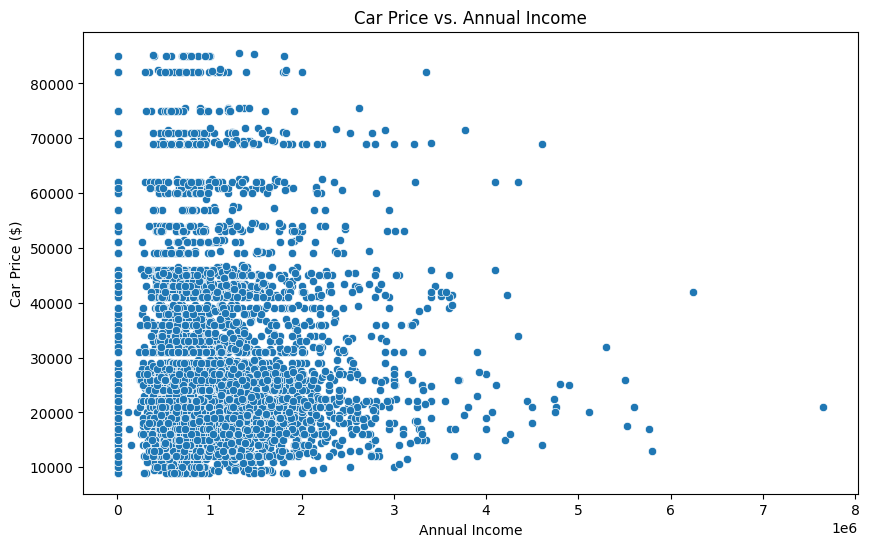

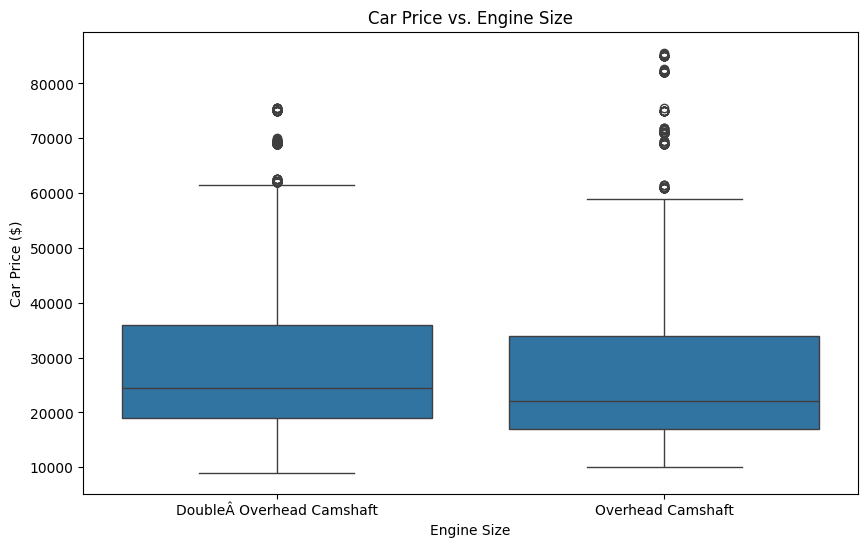

In [46]:

correlation_matrix = df2[['Price ($)', 'Annual Income']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Price, Annual Income')
plt.show()

#Further analysis (Scatter plots to visualize relationships and potential interactions)

#Scatter plot of Price vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df2)
plt.title('Car Price vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.show()


#Engine size is categorical, so a different visualization is needed for it.
#Box plot of Price vs. Engine for better visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine', y='Price ($)', data=df2)
plt.title('Car Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Car Price ($)')
plt.show()

#If you have numerical data representing engine size instead of categories, you could do a scatterplot:
#sns.scatterplot(x='Engine_Size', y='Price ($)', data=df2) #assuming 'Engine_Size' is a numerical column

#Investigate interaction effects (if applicable, assuming you have numerical engine size):
#You might try to group data by engine size (or create bins) and then look at the correlation between
#price and income within each engine size group.

In [47]:
#(15)_^ How does the average car price vary across different car models and engine types?


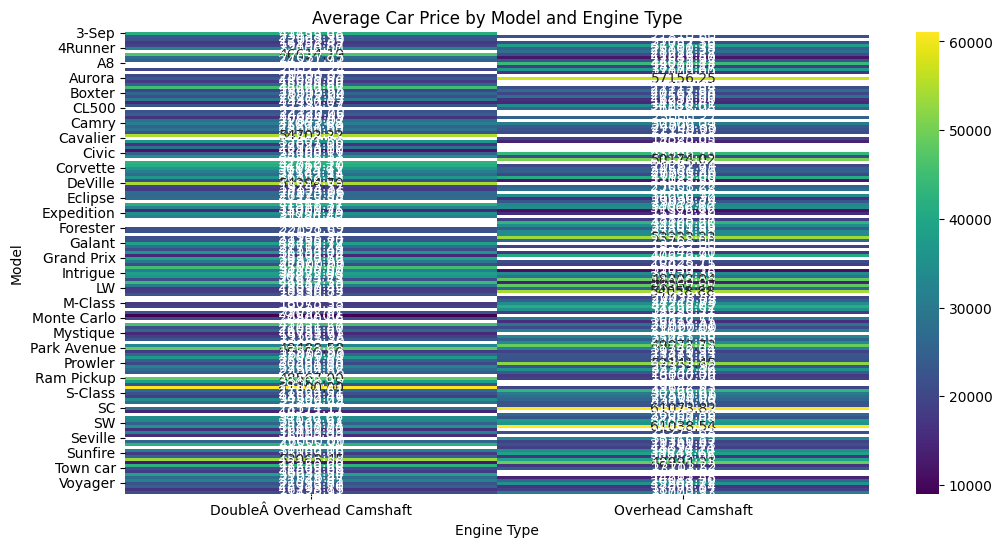

In [48]:
average_price_by_model_engine = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(average_price_by_model_engine, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Model')
plt.show()

## EDA - 3
## Amazon Sales Data

Features:

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product

In [51]:
amz = pd.read_csv("amazon.csv")

In [55]:
#(1) What is the average rating for each product category


average_rating_by_category = amz.groupby('category')['rating'].mean()
average_rating_by_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [58]:
#(2) What are the top rating_count products by category

In [59]:
# Convert 'rating_count' to numeric, handling potential commas
amz['rating_count'] = pd.to_numeric(amz['rating_count'].str.replace(',', ''), errors='coerce')

# Now you can apply nlargest
top_products_by_category = amz.groupby('category').apply(lambda x: x.nlargest(5, 'rating_count'))

print(top_products_by_category[['product_name', 'rating_count']])

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
                                                   742   Kanget [2 Pack] Type C Female to USB A Male Ch...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
OfficeProd

In [60]:
#(3)What is the distribution of discounted prices vs. actual pricesk

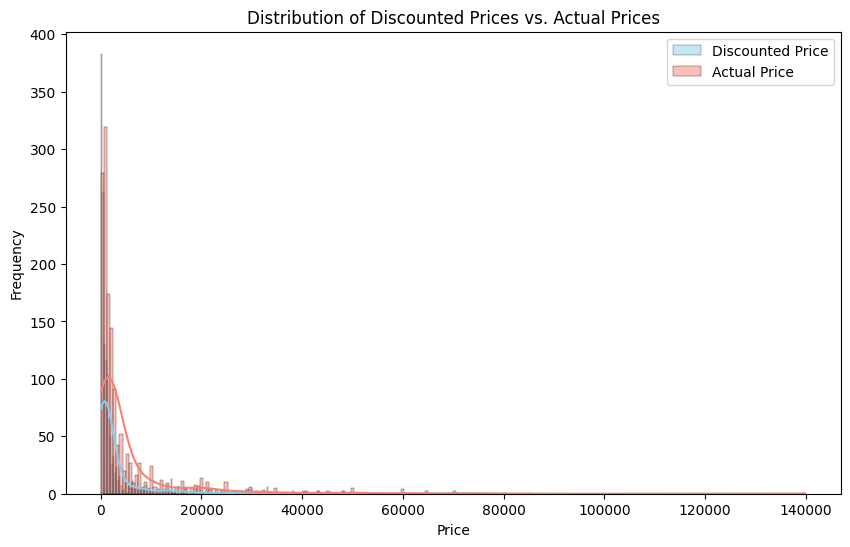

In [61]:

amz['discounted_price'] = pd.to_numeric(amz['discounted_price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
amz['actual_price'] = pd.to_numeric(amz['actual_price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(amz['discounted_price'], kde=True, label='Discounted Price', color='skyblue')
sns.histplot(amz['actual_price'], kde=True, label='Actual Price', color='salmon')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.show()

In [62]:
#(4)How does the average discount percentage vary across categories

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

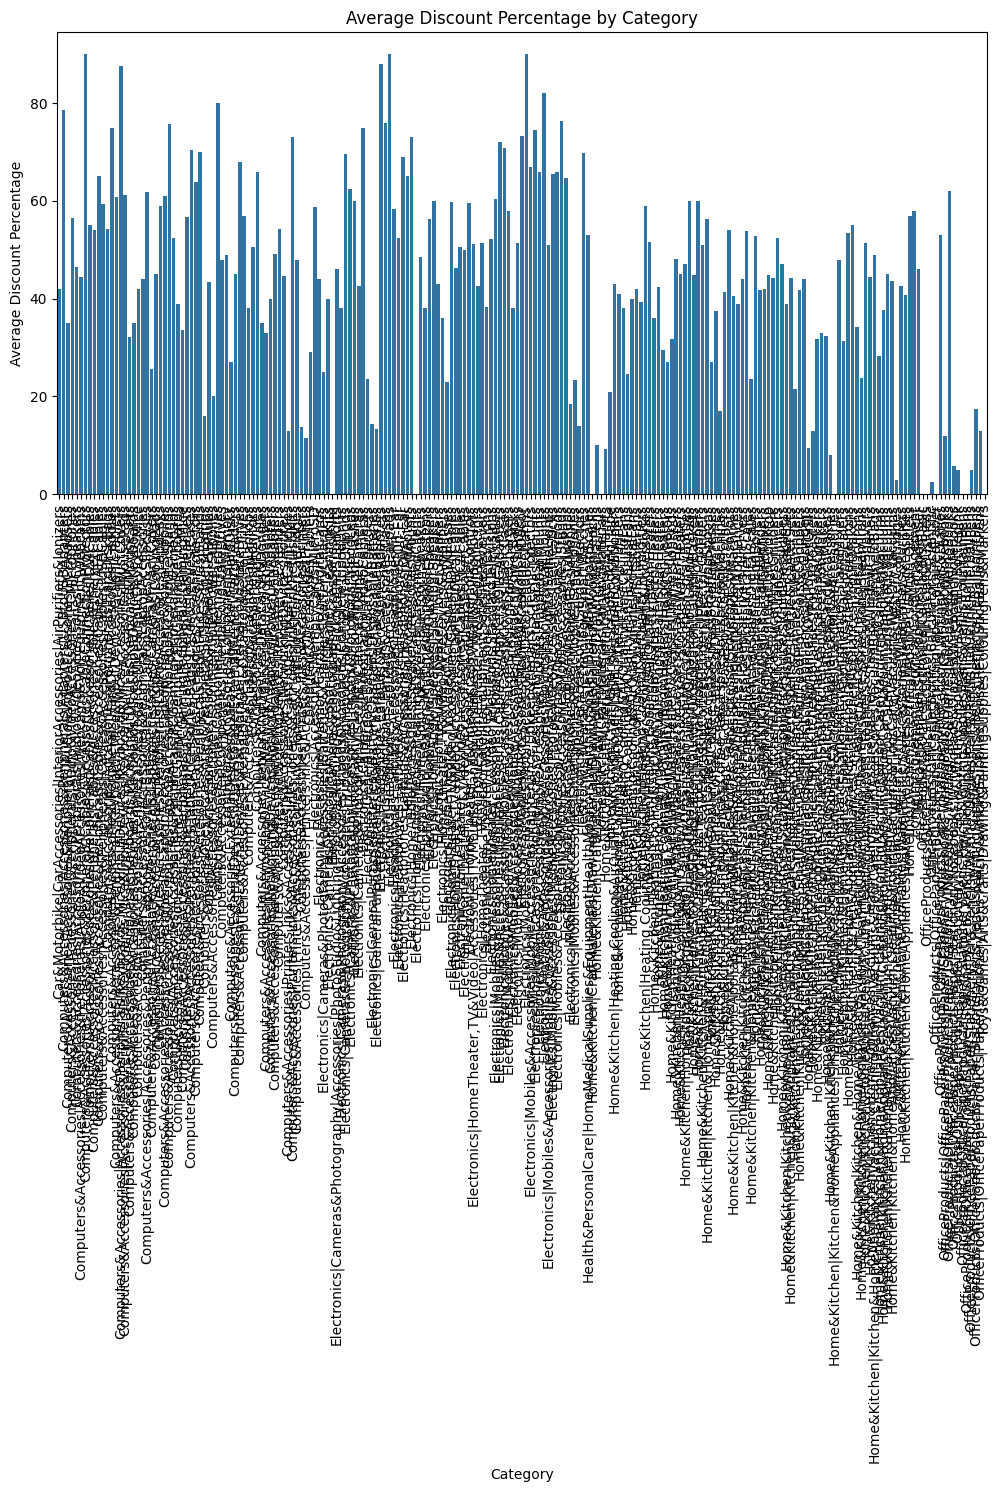

In [66]:
# Convert 'discount_percentage' column to string type before applying .str methods
amz['discount_percentage'] = amz['discount_percentage'].astype(str)

# Now you can safely apply .str methods
amz['discount_percentage'] = amz['discount_percentage'].str.rstrip('%').astype(float)

average_discount_by_category = amz.groupby('category')['discount_percentage'].mean()

# Print the result
print(average_discount_by_category)

# Create a bar plot to visualize the average discount percentage across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage by Category")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [68]:
# (5): What are the most popular product names

# Assuming 'amz' DataFrame from the previous code is available.

# Group by product name and count occurrences
product_counts = amz['product_name'].value_counts()

# Get the top N most popular product names (e.g., top 10)
top_products = product_counts.head(10)  # Change 10 to the desired number

top_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


In [69]:
# (6): What are the most popular product keywords

# Assuming 'amz' DataFrame from the provided code is available.

# Group by product name and count occurrences
product_counts = amz['product_name'].value_counts()

# Get the top N most popular product names (e.g., top 10)
top_products = product_counts.head(10)  # Change 10 to the desired number

top_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


In [70]:
# (7): What are the most popular product reviews

# Assuming 'amz' DataFrame from the provided code is available.

# Group by product name and sum the rating counts
popular_products = amz.groupby('product_name')['rating_count'].sum()

# Sort in descending order to find the most popular
most_popular_products = popular_products.sort_values(ascending=False)

# Print or display the results as needed
print(most_popular_products.head(10))  # Show the top 10 most popular

product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)                                        

The correlation between discounted_price and rating is: 0.12033741712288548


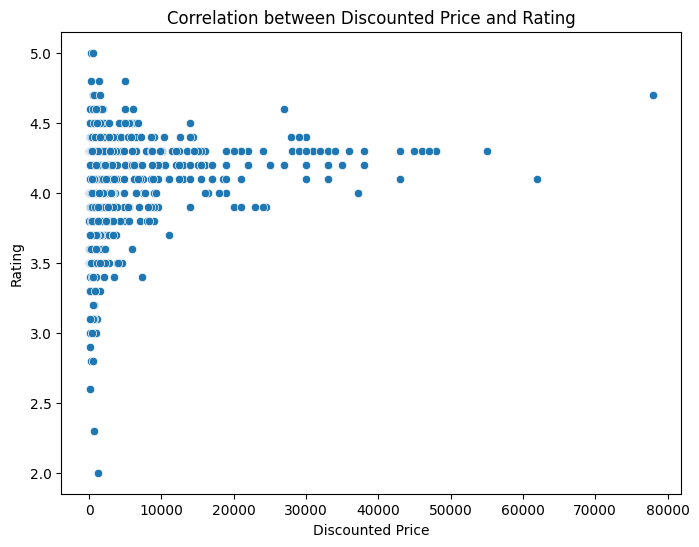

In [71]:
# (8): What is the correlation between discounted_price and rating

# Assuming 'amz' DataFrame from the provided code is available.

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = amz['discounted_price'].corr(amz['rating'])

print(f"The correlation between discounted_price and rating is: {correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='rating', data=amz)
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

In [72]:
# (9):  What are the Top 5 categories based on the highest rating

# Assuming 'amz' DataFrame from the provided code is available.

top_categories = amz.groupby('category')['rating'].mean().nlargest(5)
top_categories

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|Components|Memory,4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


In [73]:
# (10):  Identify any potential areas for improvement or optimization based on the data analysi



# Potential improvements and optimizations:

# 1. Data Cleaning and Preprocessing:
#    - Handle missing values:  Check for missing values in your datasets (df2 and amz) and handle them appropriately.
#      Options include imputation (filling with mean, median, or mode) or removal of rows/columns with missing data.
#      The current code implicitly ignores errors during numeric conversions, which might lead to inaccurate results.
#    - Data type consistency: Ensure consistent data types across columns.  For instance, the 'rating_count' and price columns needed explicit type conversions, which could be handled more robustly.
#    - Outlier detection and handling: Identify and address outliers in numerical features like 'Price ($)', 'Annual Income', and 'rating_count'.  Box plots are a good initial tool, but consider more advanced methods if needed.
#    - Feature engineering: Consider creating new features that might be predictive. For example:
#        - Price difference (Actual price - discounted price)
#        - Log-transformed prices to address skewness.
#        - Categorical features from date (season, quarter).

# 2. Visualization Improvements:
#    - Clearer labels and titles: Use more descriptive labels and titles for plots.
#    - Annotations: Add annotations to plots to highlight important points or trends.
#    - Consistent styles: Use consistent colors, fonts, and plot styles across all visualizations.
#    - Use subplots when comparing multiple categories: Combining multiple plots in a single figure can provide a better side-by-side comparison.

# 3. Statistical Analysis:
#    - More robust statistical tests: In addition to descriptive statistics, consider using statistical tests (e.g., t-tests, ANOVA) to validate your observations.
#    - Correlation analysis: Explore correlation between different features to understand their relationship in a more detailed way (using heatmaps, scatter plots, etc).
#    - Regression analysis: Consider using regression models to predict car prices based on other features.


# 4. Code Organization and Comments:
#    - Modularize the code: Break down the code into functions for better organization and reusability.
#    - Add comments: Include comments explaining the purpose of each code section.
#    - Meaningful variable names: Use more descriptive variable names for better readability.

# 5. Handling Errors:
#   - Error handling for file reading:  Add error handling in case the CSV files are not found or have incorrect formatting.

# Example (Outlier Detection and Handling - Price):

#  Instead of relying only on visualizations:
#  Q1 = df2['Price ($)'].quantile(0.25)
#  Q3 = df2['Price ($)'].quantile(0.75)
#  IQR = Q3 - Q1
#  lower_bound = Q1 - 1.5 * IQR
#  upper_bound = Q3 + 1.5 * IQR
#  df2 = df2[(df2['Price ($)'] >= lower_bound) & (df2['Price ($)'] <= upper_bound)]


# Apply similar outlier detection/handling to other numerical columns

## EDA - 4

Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global list

In [79]:
df= pd.read_csv("spotify.csv")

In [91]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [77]:
# (1): Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful

def preprocess_data(df):

    # Check for null values
    if df.isnull().values.any():
        print("Null values found in the DataFrame.")
        # Choose an appropriate strategy to handle nulls (e.g., imputation, removal)
        # Example: Fill numerical columns with the mean
        for col in df.select_dtypes(include=['number']):
            df[col] = df[col].fillna(df[col].mean())
        # Example: Fill categorical columns with the mode
        for col in df.select_dtypes(include=['object', 'category']):
            df[col] = df[col].fillna(df[col].mode()[0])

    else:
        print("No null values found.")

    # Check for duplicate rows
    if df.duplicated().any():
        print("Duplicate rows found in the DataFrame.")
        # Choose a strategy for handling duplicates (e.g., removal)
        df.drop_duplicates(inplace=True)
    else:
        print("No duplicate rows found.")

    return df

# Load your data (replace "your_file.csv" with the actual file path)
try:
    df2 = pd.read_csv("your_file.csv")  # Example using a CSV file
    df2 = preprocess_data(df2)
    print(df2.head())  # Display the first few rows of the preprocessed DataFrame

except FileNotFoundError:
    print("Error: File not found. Please provide the correct file path.")
except pd.errors.EmptyDataError:
    print("Error: The provided file is empty.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: File not found. Please provide the correct file path.


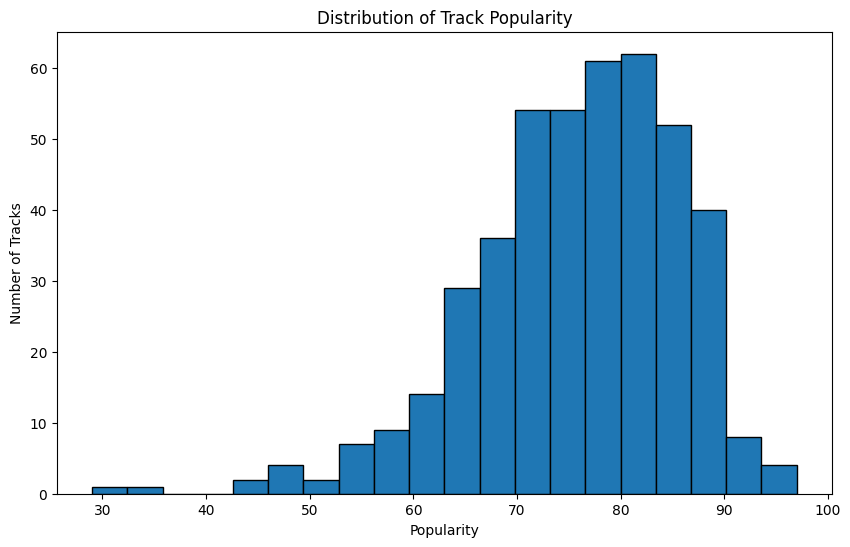

In [84]:
# (2): What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

# Assuming 'df' is your DataFrame and 'Popularity' is the column representing track popularity.
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

In [89]:
# (3): Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

# Assuming 'df' is your DataFrame and it has columns named 'Popularity' and 'duration_ms'.
# Check if the 'duration_ms' column exists in the DataFrame
if 'duration_ms' in df.columns:  # Check if 'duration_ms' is a valid column
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Popularity'], df['duration_ms'])
    plt.xlabel('Popularity')
    plt.ylabel('Duration (ms)')
    plt.title('Relationship between Popularity and Duration of Tracks')
    plt.show()
else:
    print("Error: 'duration_ms' column not found in the DataFrame.")

Error: 'duration_ms' column not found in the DataFrame.


The artist with the highest number of tracks is Drake with 20 tracks.


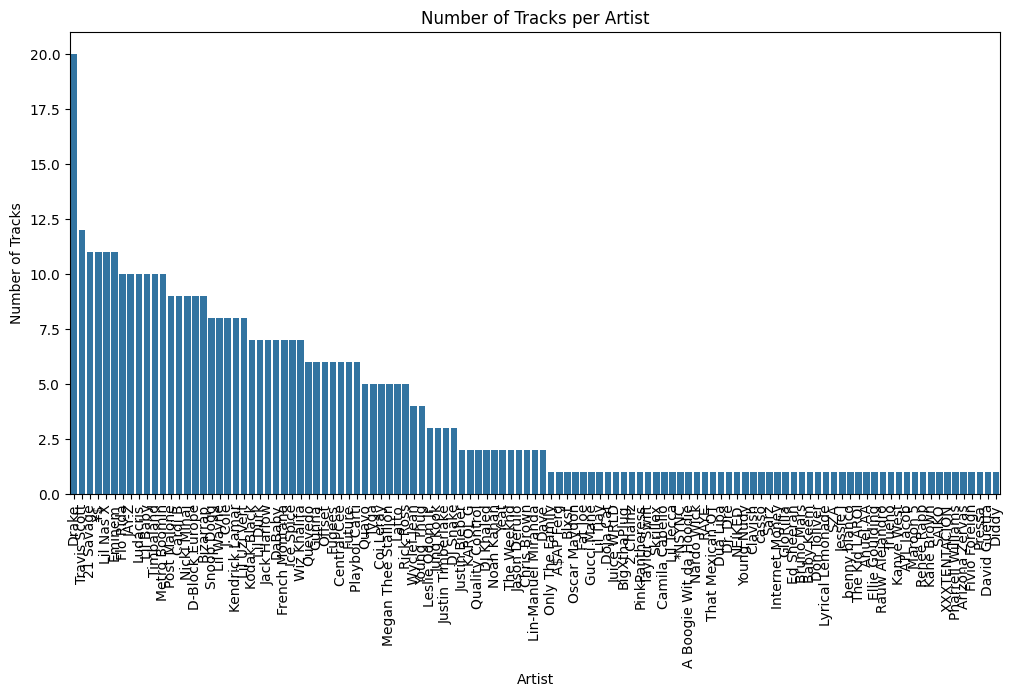

In [90]:
# (4): Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot

# Assuming 'df' is your DataFrame and it has a column named 'Artist'
artist_counts = df['Artist'].value_counts()

# Find the artist with the highest number of tracks
top_artist = artist_counts.index[0]
top_artist_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is {top_artist} with {top_artist_count} tracks.")

# Create the countplot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='Artist', data=df, order=artist_counts.index)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Artist')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [92]:
# (5):  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

# Assuming 'df' is your DataFrame and it has columns named 'Artist', 'Track Name', and 'Popularity'.

# Sort the DataFrame by popularity in ascending order
df_sorted = df.sort_values('Popularity', ascending=True)

# Get the top 5 least popular tracks
least_popular_tracks = df_sorted.head(5)

# Display the artist name and track name for each of the least popular tracks
print(least_popular_tracks[['Artist', 'Track Name']])

             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
435  French Montana                Splash Brothers
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix


In [93]:
# (6): Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist

import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'Artist' and 'Popularity'
# Replace 'spotify.csv' with the actual file name if different

try:
    df = pd.read_csv("spotify.csv")
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please make sure the file is in the correct location.")
    exit() # Exit the script if file not found


top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)

print("Average Popularity of Top 5 Artists:")
print(top_5_artists)

highest_avg_popularity_artist = top_5_artists.idxmax()
print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_avg_popularity_artist}")

Average Popularity of Top 5 Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: cassö


In [94]:
# (7):  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Assuming 'df' is your DataFrame and it has columns named 'Artist', 'Track Name', and 'Popularity'.

# Group by artist and get the most popular track for each artist
most_popular_tracks = df.loc[df.groupby('Artist')['Popularity'].idxmax()]

# Get the top 5 artists by popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5).index

# Filter the most_popular_tracks DataFrame to include only the top 5 artists
top_5_artists_popular_tracks = most_popular_tracks[most_popular_tracks['Artist'].isin(top_5_artists)]

# Print the track names for each of the top 5 artists
print("Most popular tracks for top 5 artists:")
for artist in top_5_artists:
  track = top_5_artists_popular_tracks[top_5_artists_popular_tracks['Artist'] == artist]['Track Name'].iloc[0]
  print(f"{artist}: {track}")

Most popular tracks for top 5 artists:
cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


In [97]:
# (8): Visualize relationships between multiple numerical variables simultaneously using a pair plot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with numerical columns you want to analyze
# Replace 'df' with the actual name of your DataFrame

# Check the actual column names in your DataFrame
print(df.columns)

# Create the pair plot, make sure column names match the DataFrame's columns
# Example: If your DataFrame has 'duration_ms', 'danceability', 'energy', and 'Popularity' columns:
sns.pairplot(df[['Popularity', 'duration_ms', 'danceability', 'energy']], diag_kind='kde')
plt.show()

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


KeyError: "['duration_ms', 'danceability', 'energy'] not in index"

In [98]:
# (9): Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has columns named 'Artist' and 'duration_ms'.
# Check if the required columns exist.
if 'Artist' in df.columns and 'duration_ms' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Artist', y='duration_ms', data=df)
    plt.xlabel('Artist')
    plt.ylabel('Track Duration (ms)')
    plt.title('Distribution of Track Durations Across Artists')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

    #Violin plot alternative:
    plt.figure(figsize=(12,6))
    sns.violinplot(x='Artist', y='duration_ms', data=df)
    plt.xlabel('Artist')
    plt.ylabel('Track Duration (ms)')
    plt.title('Distribution of Track Durations Across Artists')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Artist' or 'duration_ms' column not found in the DataFrame.")

Error: 'Artist' or 'duration_ms' column not found in the DataFrame.


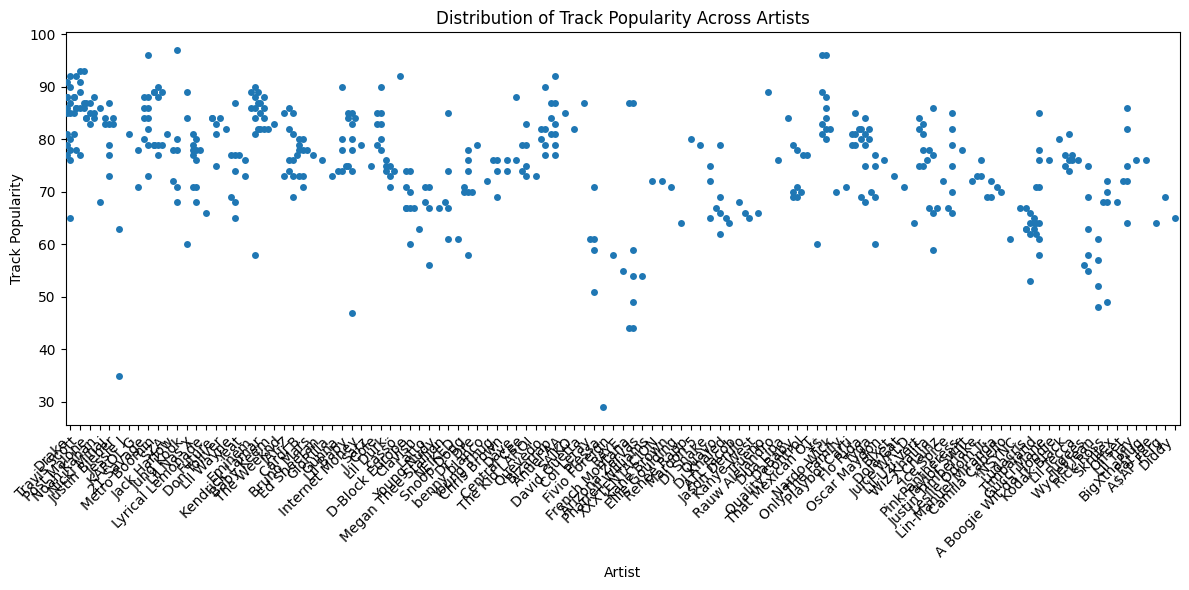

In [100]:
# (10): How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns named 'Artist' and 'Popularity'.
# Check if the required columns exist.
if 'Artist' in df.columns and 'Popularity' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='Artist', y='Popularity', data=df)  # Or sns.violinplot
    plt.xlabel('Artist')
    plt.ylabel('Track Popularity')
    plt.title('Distribution of Track Popularity Across Artists')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("Error: 'Artist' or 'Popularity' column not found in the DataFrame.")